In [108]:
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import datetime
%matplotlib inline

In [109]:
df = pd.read_csv('./City Bike.csv')
df.head()

,id,gender_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,25242,2,2016-05-30 15:23:05,2016-05-30 15:52:59,-73.976485,40.759923,-74.002150,40.730386,1794
1,20900,1,2016-04-24 19:56:47,2016-04-24 20:02:17,-74.003664,40.743174,-74.002150,40.730386,329
2,18792,1,2016-06-25 15:08:38,2016-06-25 15:15:57,-73.991908,40.716059,-74.005524,40.711464,438
3,17420,1,2016-06-28 18:14:17,2016-06-28 18:35:25,-73.986569,40.701485,-73.989900,40.714275,1268
4,22403,1,2016-06-11 17:10:33,2016-06-11 17:14:44,-73.989551,40.740343,-73.990093,40.737050,251


In [110]:
lat_lon= df[['pickup_longitude','pickup_latitude']]

In [111]:
unique_loc = lat_lon.drop_duplicates()

In [112]:
unique_loc.count()

pickup_longitude    492
pickup_latitude     492
dtype: int64

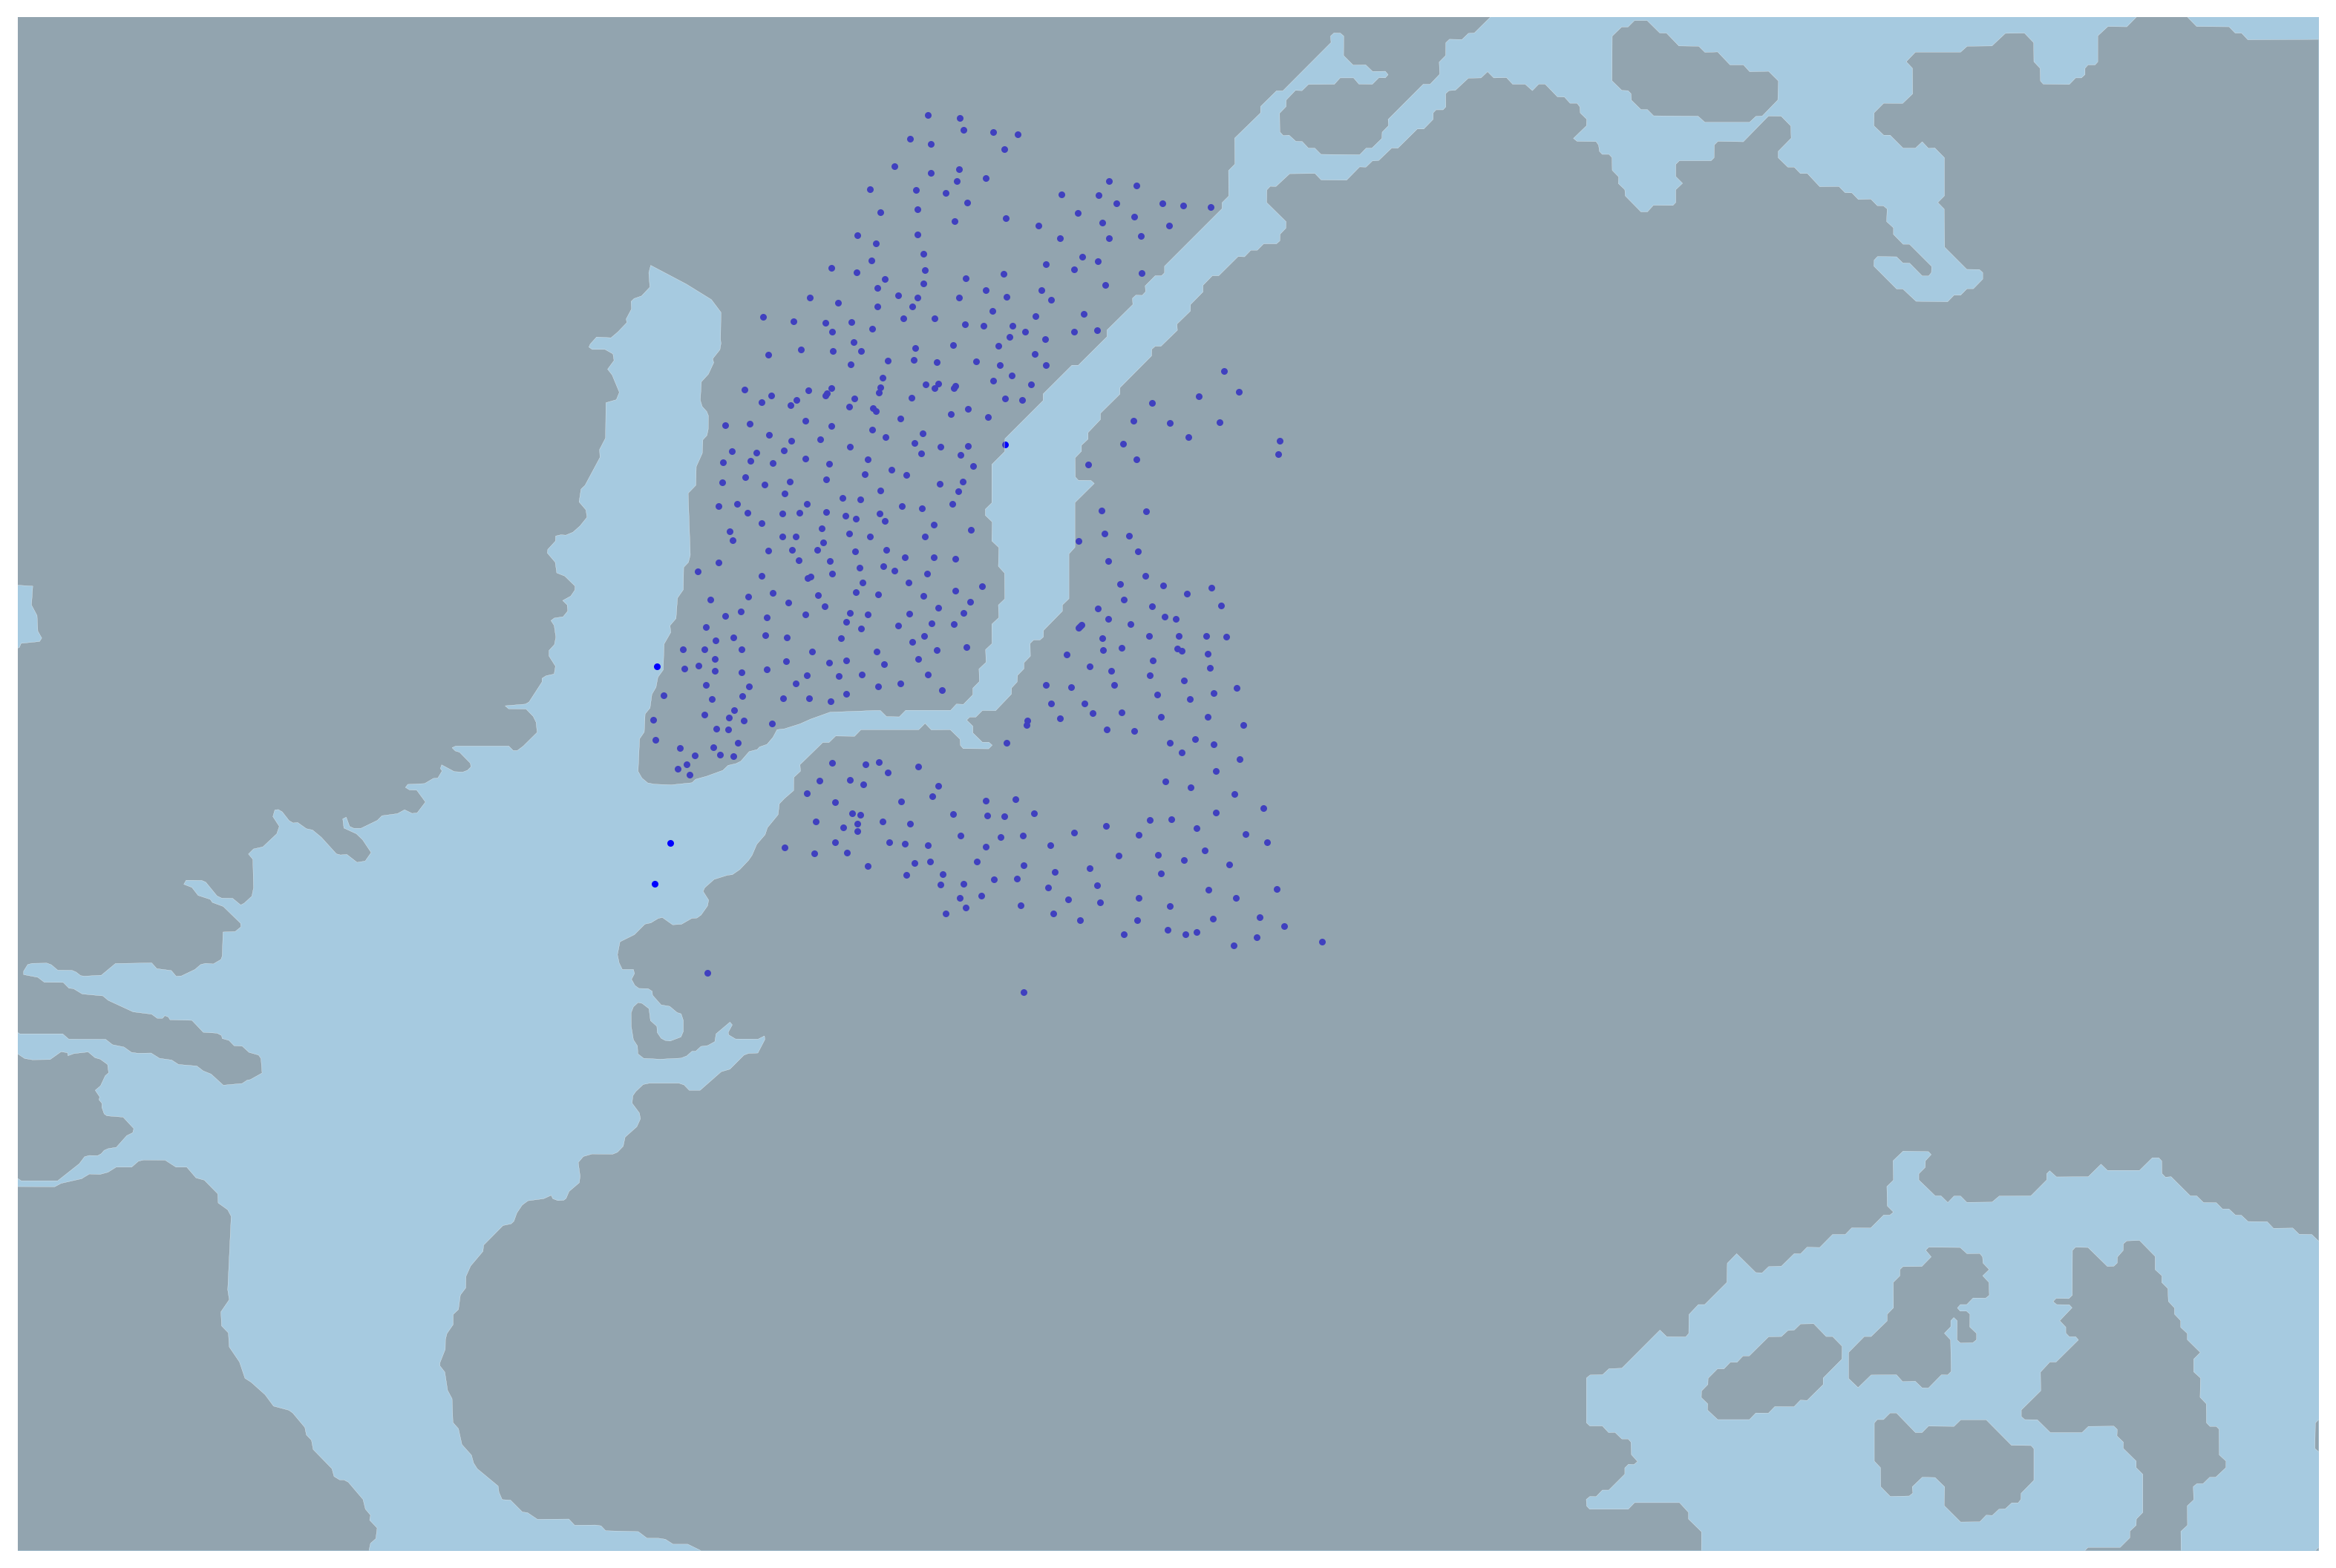

In [113]:
llon = -74.1
llat = 40.6
rlon = -73.8
rlat = 40.8

plt.figure(figsize=(20, 20), dpi=200)

m=Basemap(llcrnrlon=llon,llcrnrlat=llat,urcrnrlon=rlon,urcrnrlat=rlat,resolution='f')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")

m.scatter(unique_loc['pickup_longitude'],unique_loc['pickup_latitude'],s=5,alpha=1,color='b')

In [114]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [115]:
# Random choose a day
goal = datetime.date(2016,3,15)

In [116]:
filter_day = [each.date()==goal for each in df['pickup_datetime']]

In [117]:
select_day = df[filter_day]
select_day.head()

,id,gender_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
174,22020,1,2016-03-15 19:14:26,2016-03-15 19:21:26,-73.991600,40.749156,-73.979661,40.743943,420
270,14777,1,2016-03-15 06:27:25,2016-03-15 06:37:54,-73.987654,40.750977,-73.968654,40.758997,629
407,14625,1,2016-03-15 09:20:20,2016-03-15 09:24:45,-73.949549,40.695398,-73.948186,40.704118,264
423,24280,1,2016-03-15 13:09:29,2016-03-15 13:18:12,-73.990093,40.737050,-73.993790,40.727434,522
636,21298,2,2016-03-15 08:39:33,2016-03-15 09:02:22,-73.989780,40.726281,-73.988557,40.746201,1368


In [118]:
select_day['id'].count()

25109

In [119]:
taxi_df = pd.read_csv('./data_with_weather.csv')
taxi_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day,hour,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,51,40,45.5,0.29,0,0
1,1,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,2016-03-14,14,51,40,45.5,0.29,0,0
2,2,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,2016-03-14,15,51,40,45.5,0.29,0,0
3,3,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,2016-03-14,4,51,40,45.5,0.29,0,0
4,4,id3817493,2,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,N,1050,2016-03-14,14,51,40,45.5,0.29,0,0


In [120]:
taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df['pickup_datetime'])
filter_taxi = [each.date()==goal for each in taxi_df['pickup_datetime']]
select_taxi= taxi_df[filter_taxi]
select_taxi['id'].count()

16064

In [121]:
select_taxi.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day,hour,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
1198462,1198462,id3502065,1,2016-03-15 21:03:44,2016-03-15 21:14:37,1,-73.974014,40.757153,-73.949738,40.777092,N,653,2016-03-15,21,57,44,50.5,0,0,0
1198463,1198463,id1073968,1,2016-03-15 09:44:58,2016-03-15 10:07:43,1,-73.955215,40.780247,-73.861832,40.768456,N,1365,2016-03-15,9,57,44,50.5,0,0,0
1198464,1198464,id3570508,1,2016-03-15 10:21:28,2016-03-15 10:41:09,2,-73.982285,40.768200,-73.978012,40.751068,N,1181,2016-03-15,10,57,44,50.5,0,0,0
1198465,1198465,id2969048,1,2016-03-15 22:56:30,2016-03-15 23:01:00,2,-73.986435,40.730473,-73.991898,40.732838,N,270,2016-03-15,22,57,44,50.5,0,0,0
1198466,1198466,id1965717,2,2016-03-15 14:55:37,2016-03-15 15:09:30,1,-73.971680,40.760635,-73.989441,40.736713,N,833,2016-03-15,14,57,44,50.5,0,0,0


#### AT 2016.3.15 Taxi:16064 Bike:25109

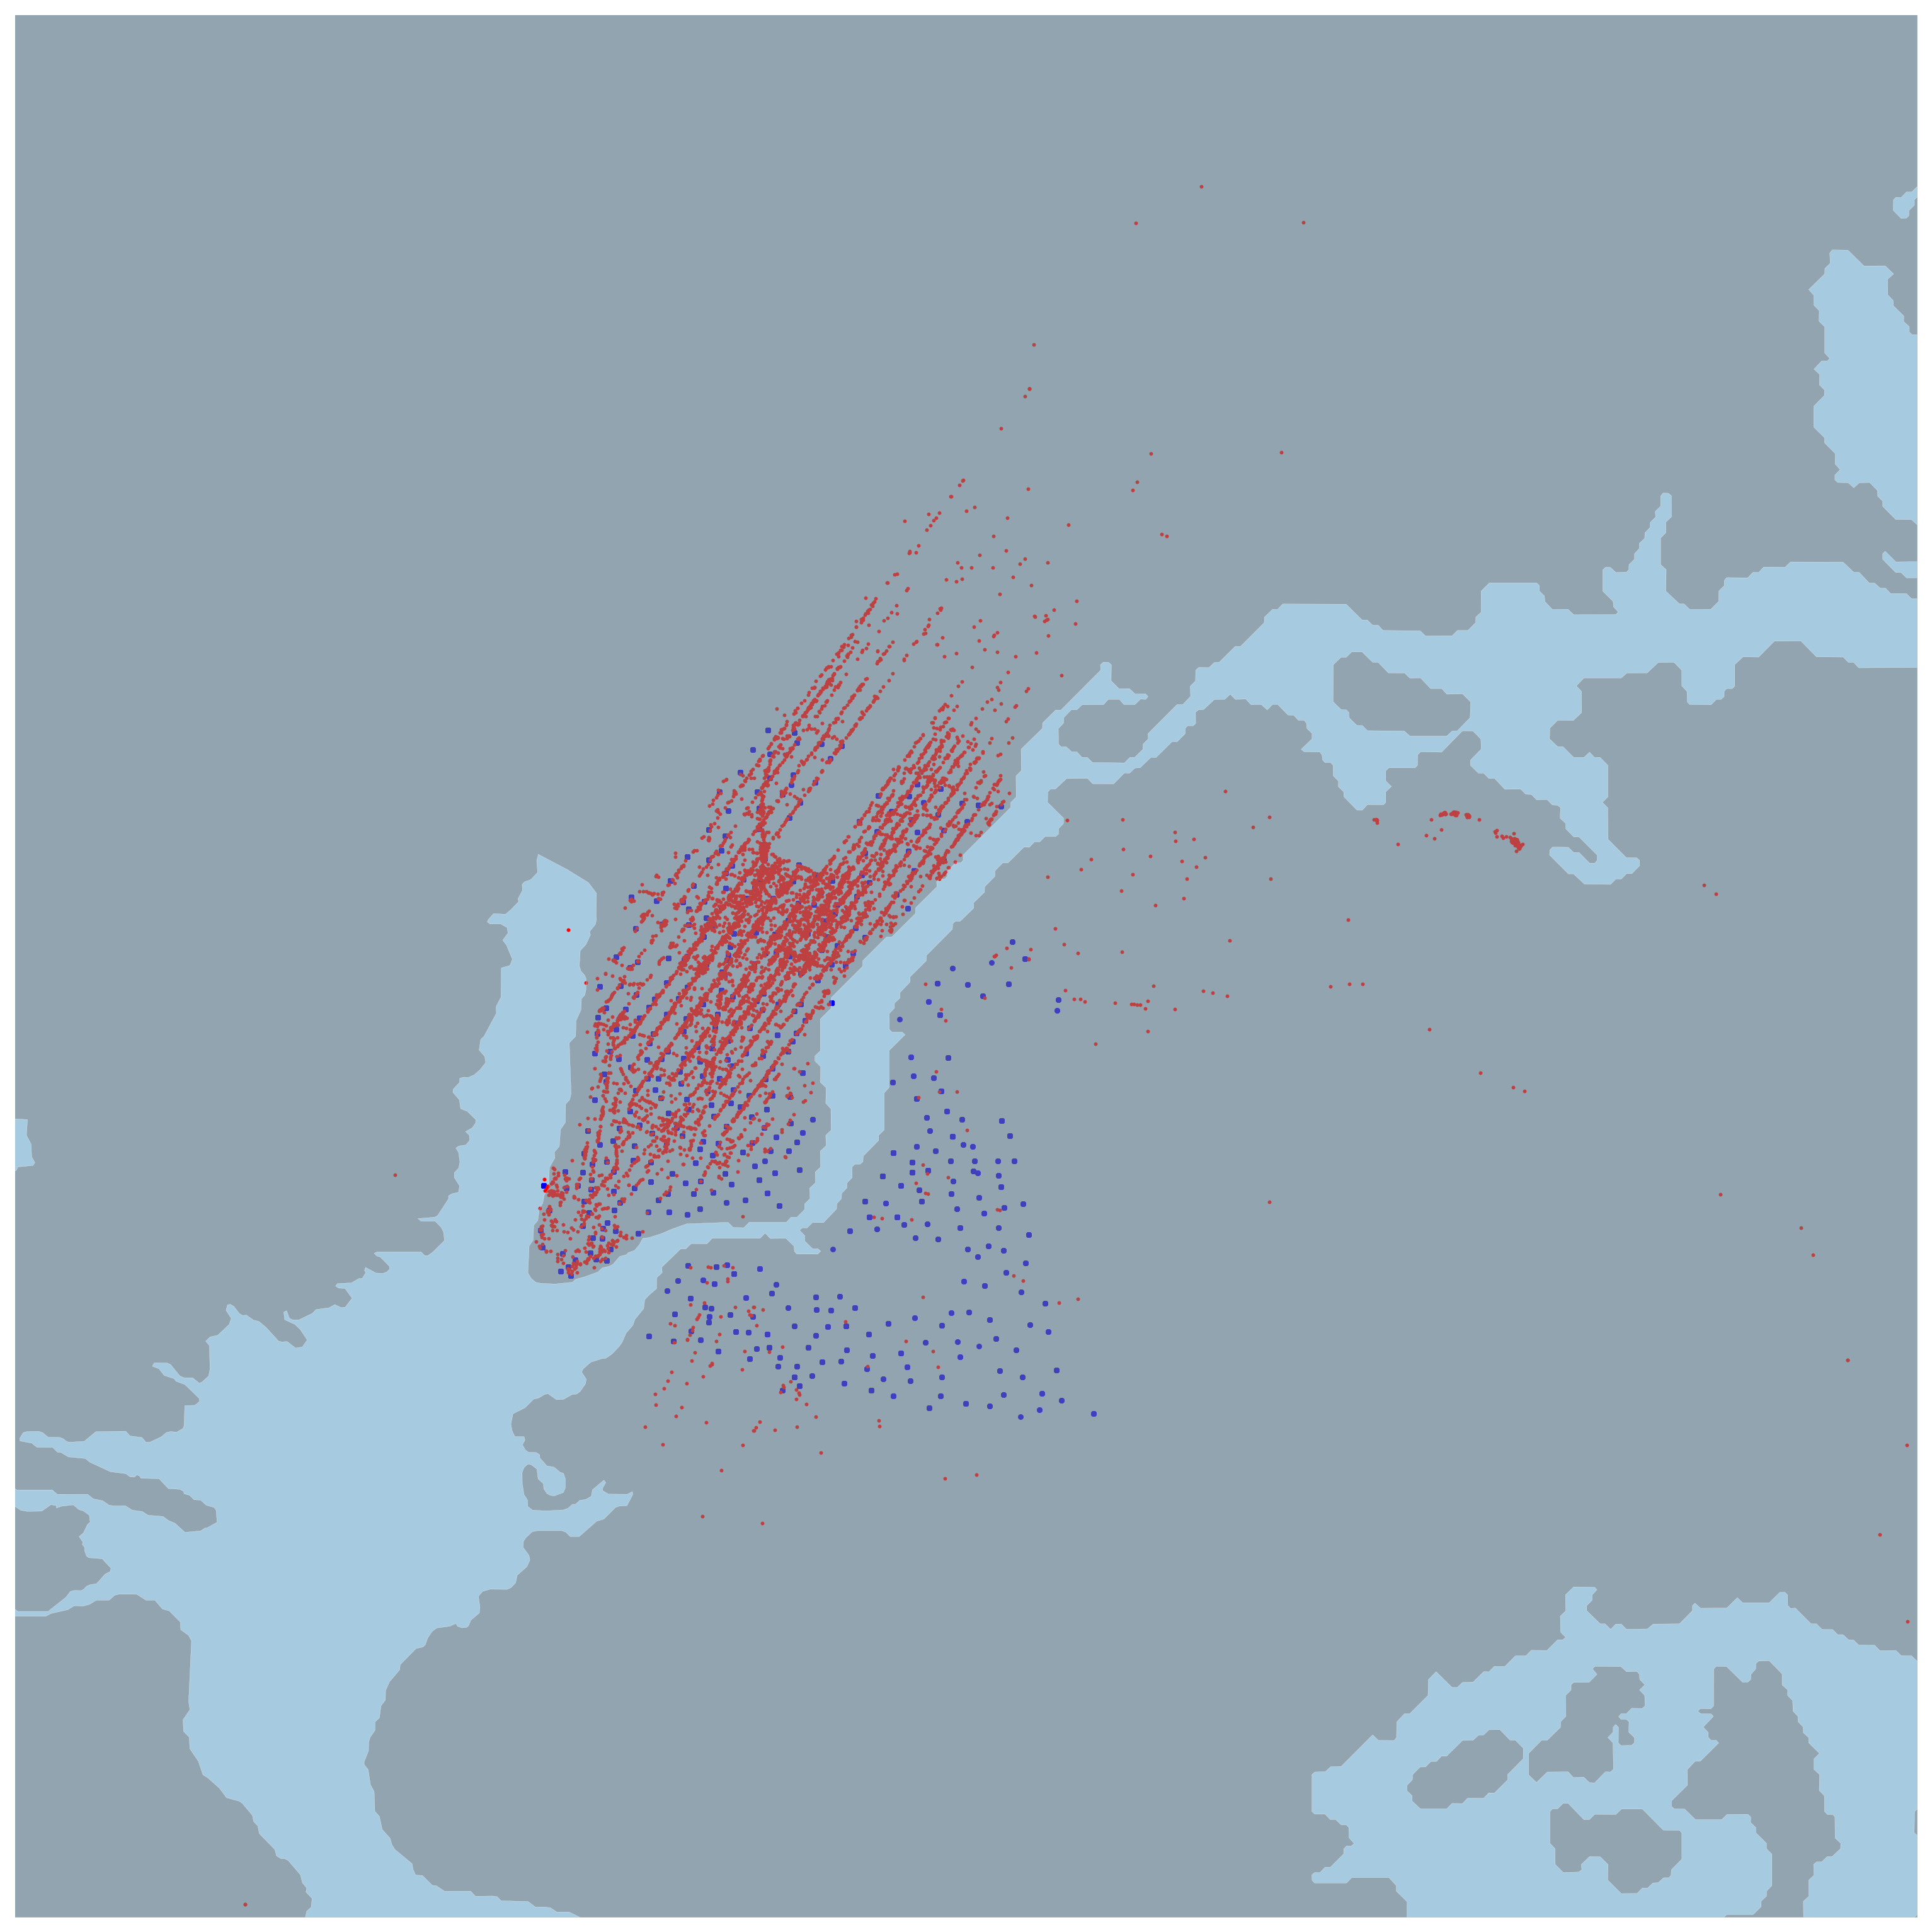

In [122]:
llon = -74.1
llat = 40.6
rlon = -73.8
rlat = 40.9

plt.figure(figsize=(20, 20), dpi=200)

m=Basemap(llcrnrlon=llon,llcrnrlat=llat,urcrnrlon=rlon,urcrnrlat=rlat,resolution='f')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")

m.scatter(select_day['pickup_longitude'],select_day['pickup_latitude'],s=5,alpha=1,color='b')
m.scatter(select_taxi['pickup_longitude'],select_taxi['pickup_latitude'],s=1,alpha=1,color='r')

In [123]:
dif_day_bike = [each.date() for each in df['pickup_datetime']]

In [124]:
dif_day_bike = set(dif_day_bike)
averge_num_bike=df['id'].count()/len(dif_day_bike)
print("Average trip number of share bike:" + str(averge_num_bike))

Average trip number of share bike:25280.898876404495


In [125]:
dif_day_taxi = [each.date() for each in taxi_df['pickup_datetime']]
dif_day_taxi = set(dif_day_taxi)
average_num_taxi = taxi_df['id'].count()/len(dif_day_taxi)
print("Average trip number of taxi:" + str(average_num_taxi))

Average trip number of taxi:16029.054945054944
